# Python AlgoTrader

### Created By: Aaron Gao

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf
import matplotlib.pyplot as plt
from prettytable import PrettyTable

Python AlgoTrader analyzes historical stock data and uses the intersection of moving averages to determine the 
entry and exit of a position. A table of dates and an accompanying chart are generated, presenting both the date 
and corresponding entry or exit prices. For this example, I used PayPal (PYPL) as a sample stock for presentation.

In [2]:
long_MA_duration = 200
short_MA_duration = 20
long_MA = 0
short_MA = 0
long_MA_arr = []
short_MA_arr = []
long_MA_dates = []
short_MA_dates = []
crossover_dates = []
crossover_price = []
crossover_action = []
wealth = 1000
num_stock = 0
stock = 'PYPL'
start_date =  '2015-01-01'
end_date = '2023-01-01'
interval = '1d'
profit = 0
day = 0
previous = "below"
table = PrettyTable(["Date", "# of Shares", "Wealth ($)", "Action"])

The Long Term Moving Average used is 200 days and Short Term Moving Average used is 20 days. This presents a clear and effective way to track
when a stock is above or below its historical patterns.

In [3]:
yf.pdr_override()
df = yf.download(tickers=stock, start=start_date, end=end_date, interval=interval)
df.reset_index(inplace=True) 
df['date'] = df['Date'].dt.date

[*********************100%%**********************]  1 of 1 completed


Get stock data from the Yahoo Finance API using the yfinance library in Python.

In [4]:
for i in range (len (df)):
    price = df.loc[i, "Open"]
    date = df.loc[i, "Date"]
    
    long_MA += price/long_MA_duration
    short_MA += price/short_MA_duration
    
    day += 1
    
    if (day > long_MA_duration):
        long_MA -= df.loc[i-long_MA_duration, "Open"]/long_MA_duration
    if (day > short_MA_duration):
        short_MA -= df.loc[i-short_MA_duration, "Open"]/short_MA_duration
    
    if (day > short_MA_duration):
        short_MA_dates.append(date)   
        short_MA_arr.append(short_MA)   

    if (day > long_MA_duration): 
        long_MA_arr.append(long_MA)
        long_MA_dates.append(date)    
             
        # If the 20 day moving average crosses below the 200 day moving average,
        # the stocks will be sold
        if (short_MA < long_MA and previous == "above"):
            crossover_dates.append(date)
            crossover_price.append(price)
            crossover_action.append("Sell")
            wealth = num_stock * price
            num_stock = 0                
            table.add_row([date, round(num_stock, 2), round(wealth, 2), "Sell"])
            previous = "below"
            
        # If the 20 day moving average crosses above the 200 day moving average,
        # the stocks will be bought
        if (short_MA > long_MA and previous == "below"):
            crossover_dates.append(date)
            crossover_price.append(price)
            crossover_action.append("Buy")
            num_stock = wealth / price
            wealth = 0              
            table.add_row([df.loc[i, "Date"], round(num_stock, 2), round(wealth, 2), "Buy"])
            previous = "above"

This represents the bulk of the trading algorithm. As the program goes through all the historical data, it keeps track of the 
relative position between the 20 Day MA and the 200 Day MA. When the 20 Day MA crosses over the 200 Day MA from below to above, 
the algorithm sells all the stocks it is currently holding. The logic behind this is that the short term gains have exceeded
the long term stability of the stock and it is a good team to reap the rewards before the market balances itself once more. Similarly,
when the 20 Day MA crosses over the 200 Day MA from above to below, the algorithm converts all the capital into stock holding as
the current stock price is below its historical value.

In [5]:
if (wealth == 0):
    wealth = num_stock * df.loc[len(df)-1, "Close"]
    table.add_row(df.loc[i, "Date"], round(num_stock, 2), round(wealth, 2), "Sell")

The algorithm will empty the portfolio is their are still stocks remaining.

In [6]:
profit = wealth - 1000

print (table)
print ("TOTAL")
print ("FROM", start_date, end_date)
print ("WEALTH =", round(wealth, 2))
print ("PROFIT =", round(profit, 2))

+---------------------+-------------+------------+--------+
|         Date        | # of Shares | Wealth ($) | Action |
+---------------------+-------------+------------+--------+
| 2016-04-20 00:00:00 |    25.48    |     0      |  Buy   |
| 2016-07-06 00:00:00 |      0      |   915.9    |  Sell  |
| 2016-07-13 00:00:00 |    23.58    |     0      |  Buy   |
| 2018-10-30 00:00:00 |      0      |  1894.29   |  Sell  |
| 2018-11-08 00:00:00 |     21.6    |     0      |  Buy   |
| 2019-10-07 00:00:00 |      0      |  2205.55   |  Sell  |
| 2020-01-09 00:00:00 |    19.52    |     0      |  Buy   |
| 2020-03-17 00:00:00 |      0      |  1844.63   |  Sell  |
| 2020-04-30 00:00:00 |     15.2    |     0      |  Buy   |
| 2021-10-14 00:00:00 |      0      |  3975.03   |  Sell  |
+---------------------+-------------+------------+--------+
TOTAL
FROM 2015-01-01 2023-01-01
WEALTH = 3975.03
PROFIT = 2975.03


The profit over time is calculated and printed onto the screen. Similarly, a table representing the optimal entry and exit points
is also listed.

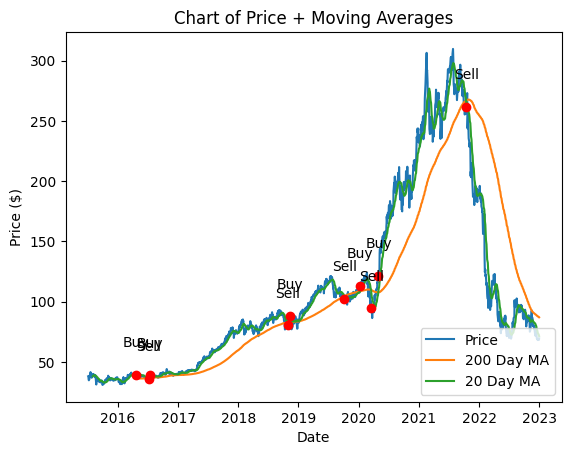

In [7]:
plt.title("Chart of Price + Moving Averages")
plt.plot(df["Date"], df["Open"], label = "Stock Price")
plt.plot(long_MA_dates, long_MA_arr, label = "200 Day Moving Average")
plt.plot(short_MA_dates, short_MA_arr, label = "20 Day Moving Average")
plt.plot(crossover_dates, crossover_price, "ro")
for i in range (len (crossover_dates)):
    plt.annotate(crossover_action[i], 
                 (crossover_dates[i],crossover_price[i]), 
                 textcoords="offset points",
                 xytext=(0,20),
                 ha='center') 
plt.xlabel("Date")
plt.ylabel("Price ($)") 
plt.legend(["Price", "200 Day MA", "20 Day MA"], loc ="lower right") 
plt.plot()

plt.show()

Finally, the information is also displayed onto a graph, giving a visual depiction of the optimal dates to buy and sell a position.

Even though PayPal only went up 80% in value from 2015 to 2023, Python AlgoTrader was able to capture far greater returns
as it accurately sold its shares when the stock reached its peak in late 2021. With a 297.5% return rate over 8 years, Python 
AlgoTrader certainly has potential in making lucrative financial decisions. 